<a href="https://colab.research.google.com/github/Gizelle-16/Gitel_Scifor/blob/main/logistic_Regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
df = pd.read_csv("breast_cancer.csv")


In [5]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [7]:
df.columns

Index(['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

(array([444.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 239.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

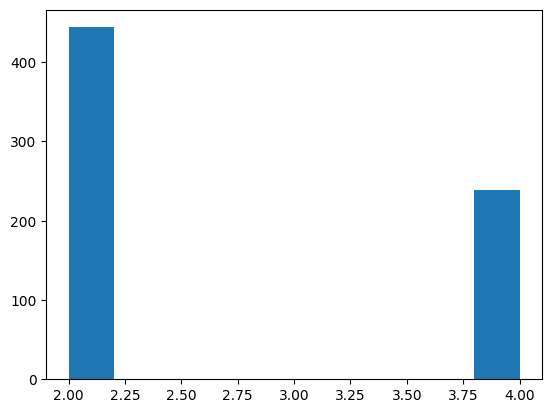

In [11]:
plt.hist(df['Class'])

In [12]:
#converting 4 and 2 to 1 and 0 respectively
df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

training and testing split

In [29]:
X = df.drop(['Class'], axis=1).values
y = df['Class'].values

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [31]:
#checking shape of data
X_train.shape, X_test.shape

((512, 9), (171, 9))

In [32]:
y_train.shape, y_test.shape


((512,), (171,))

In [33]:
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

Defining sigmoid finction

In [34]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

model building

In [35]:
def model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n,1))
    B = 0

    cost_list = []

    for i in range(iterations):

        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)

        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))

        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)

        W = W - learning_rate*dW.T
        B = B - learning_rate*dB

        # Keeping track of our cost function value
        cost_list.append(cost)

        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)

    return W, B, cost_list

calculating cost

In [36]:
iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599453
cost after  10000 iteration is :  0.22065644934977635
cost after  20000 iteration is :  0.17223570425743412
cost after  30000 iteration is :  0.1458101758342933
cost after  40000 iteration is :  0.12903778355096113
cost after  50000 iteration is :  0.11756741646560041
cost after  60000 iteration is :  0.10930141344115181
cost after  70000 iteration is :  0.10310216163703206
cost after  80000 iteration is :  0.09830535229611495
cost after  90000 iteration is :  0.09449993143680137


plotting cost

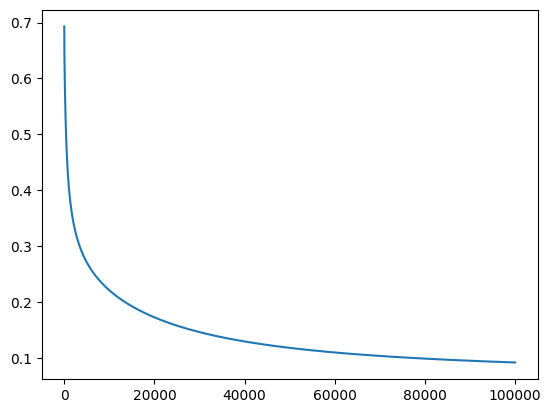

In [37]:
plt.plot(np.arange(iterations), cost_list)
plt.show()